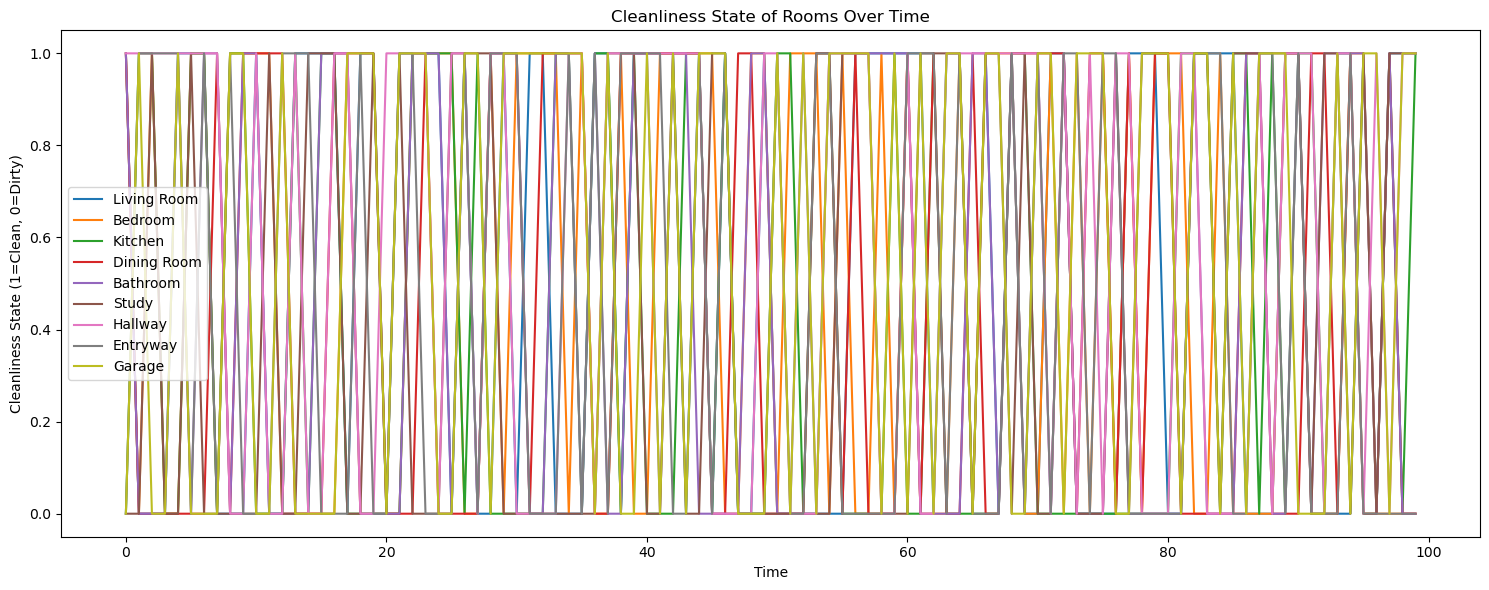

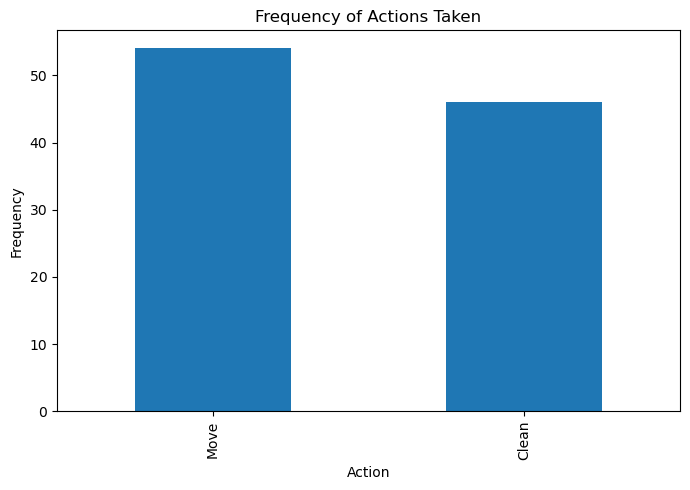

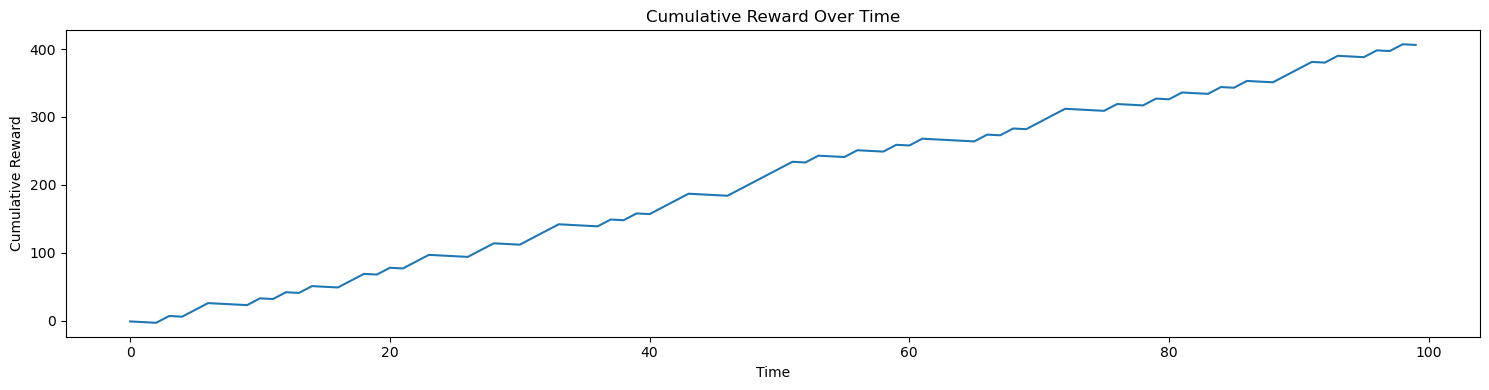

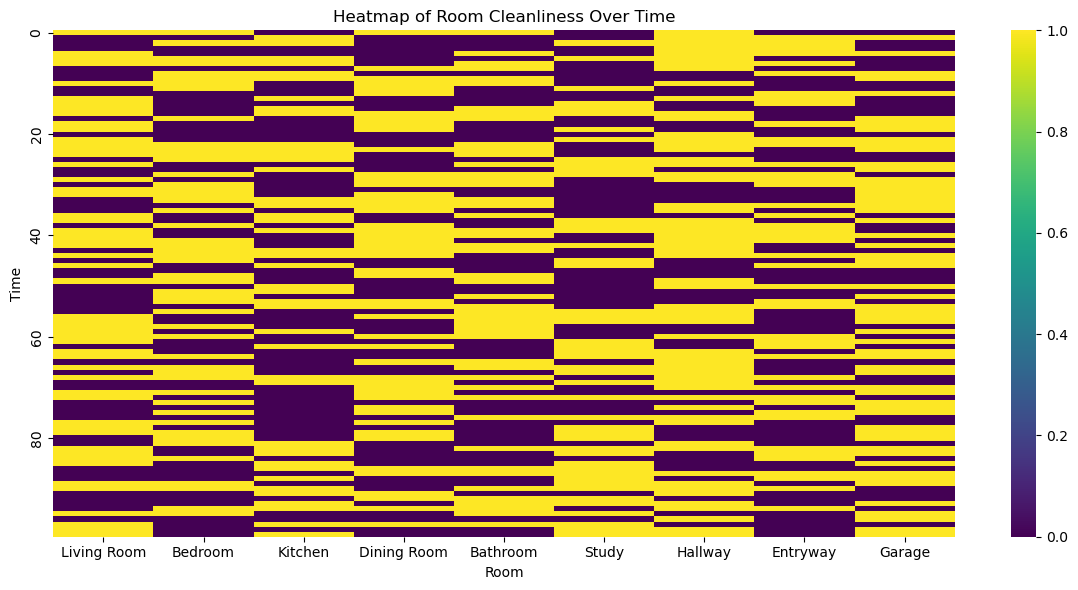

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Simulate a simplified version of the scenario to create data for plots/visualizations

# Parameters
rooms = ['Living Room', 'Bedroom', 'Kitchen', 'Dining Room', 'Bathroom', 'Study', 'Hallway', 'Entryway', 'Garage']
cleanliness_states = ['Clean', 'Dirty']
actions = ['Move', 'Clean']  # Removed 'Recharge'
rewards = {'Clean': 10, 'Move': -1, 'Stay': 2}  # Removed 'Recharge' and 'Battery Out'

# Example data generation for plots
np.random.seed(42)  # For reproducible results

# Generating random states of cleanliness for rooms
cleanliness = np.random.choice(cleanliness_states, size=(9, 100), p=[0.5, 0.5])

# Generate some actions and associated rewards
actions_taken = np.random.choice(actions, size=100, p=[0.5, 0.5])  # Updated probabilities
rewards_received = [rewards.get(action, 0) for action in actions_taken]  # Removed 'Battery Out'

# Convert to DataFrame for easier manipulation
df_cleanliness = pd.DataFrame(cleanliness.T, columns=rooms)
df_actions_rewards = pd.DataFrame({'Action': actions_taken, 'Reward': rewards_received})

# Plot 1: Cleanliness state of rooms over time
plt.figure(figsize=(15, 6))
for room in rooms:
    plt.plot(df_cleanliness.index, df_cleanliness[room] == 'Clean', label=room)
plt.xlabel('Time')
plt.ylabel('Cleanliness State (1=Clean, 0=Dirty)')
plt.title('Cleanliness State of Rooms Over Time')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Frequency of actions taken
plt.figure(figsize=(7, 5))
df_actions_rewards['Action'].value_counts().plot(kind='bar')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Frequency of Actions Taken')
plt.tight_layout()
plt.show()

# Plot 3: Rewards over time
plt.figure(figsize=(15, 4))
plt.plot(df_actions_rewards['Reward'].cumsum())
plt.xlabel('Time')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.tight_layout()
plt.show()

# Plot 4: Heatmap of room cleanliness over time
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleanliness.applymap(lambda x: 1 if x == 'Clean' else 0), cmap='viridis', yticklabels=20)
plt.xlabel('Room')
plt.ylabel('Time')
plt.title('Heatmap of Room Cleanliness Over Time')
plt.tight_layout()
plt.show()


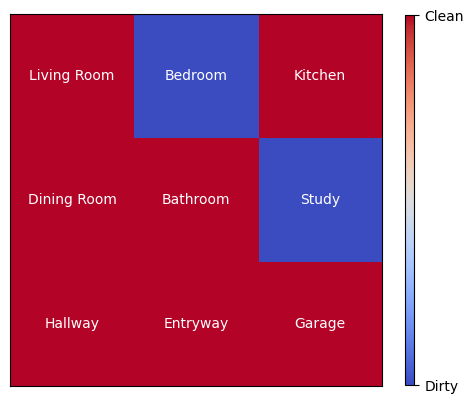

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the visualization
rooms = ['Living Room', 'Bedroom', 'Kitchen', 
         'Dining Room', 'Bathroom', 'Study', 
         'Hallway', 'Entryway', 'Garage']
cleanliness_states = {'Clean': 1, 'Dirty': 0}

# Randomly assign cleanliness states to rooms for visualization purposes
np.random.seed(42)
room_states = np.random.choice(list(cleanliness_states.values()), len(rooms))

# Create a 3x3 grid to represent the rooms
grid = room_states.reshape((3, 3))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Use matshow to create the color-coded grid
cax = ax.matshow(grid, cmap='coolwarm')

# Add the room labels
for (i, j), room in np.ndenumerate(grid):
    room_label = rooms[i * 3 + j]
    ax.text(j, i, room_label, va='center', ha='center', color='white')

# Hide the axes ticks
ax.set_xticks([])
ax.set_yticks([])

# Add color bar to show mapping from cleanliness states to colors
cbar = plt.colorbar(cax, aspect=40, shrink=0.8, ticks=[0, 1])
cbar.ax.set_yticklabels(['Dirty', 'Clean'])

plt.show()


In [4]:
pip install pymdptoolbox


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install gym


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     - ----------------------------------- 20.5/721.7 kB 162.5 kB/s eta 0:00:05
     -- ---------------------------------- 41.0/721.7 kB 245.8 kB/s eta 0:00:03
     --- --------------------------------- 71.7/721.7 kB 357.2 kB/s eta 0:00:02
     ------------------ ------------------- 358.4/721.7 kB 1.5 MB/s eta 0:00:01
     -------------------------------------  716.8/721.7 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Pre

Value Iteration converged in 554 iterations.


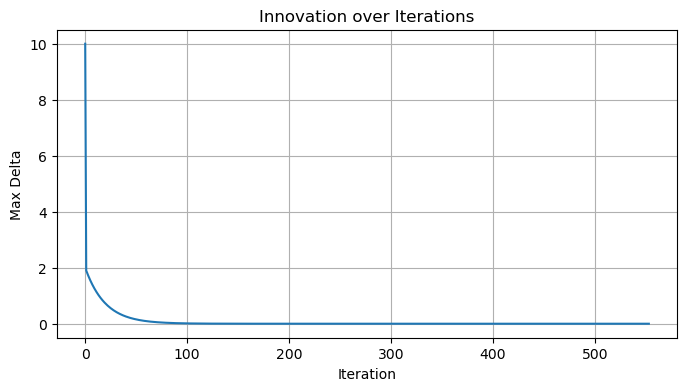

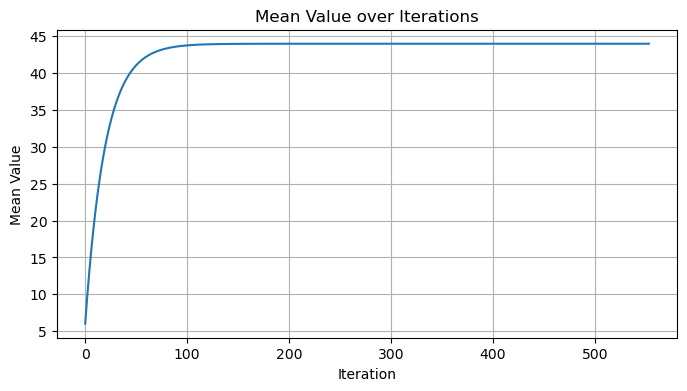

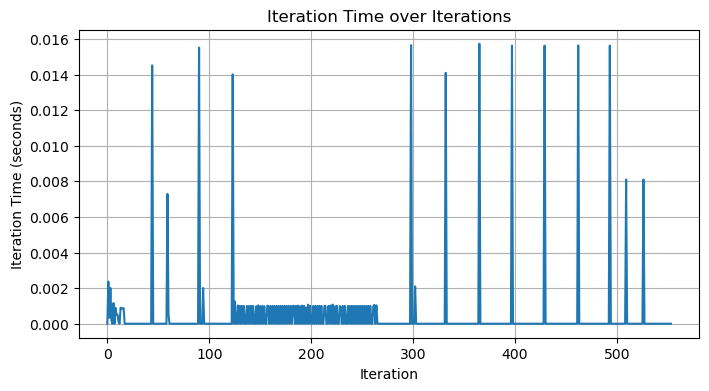

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_rooms = 9
states_per_room = 2  # Clean, Dirty
n_states = n_rooms * states_per_room
n_actions = 2  # Move, Clean 
gamma = 0.95  # discount factor
epsilon = 1e-12  # convergence threshold
max_iterations = 1000

# Initialize Transition and Reward Matrices
P = np.zeros((n_actions, n_states, n_states))
R = np.zeros((n_states, n_actions))

# Populate the transition probabilities and rewards
for room in range(n_rooms):
    for cleanliness in range(states_per_room):
        state_index = room * states_per_room + cleanliness
        # Move action
        P[0, state_index, :] = 0  # Reset probabilities
        next_room = (room + 1) % n_rooms
        next_state = next_room * states_per_room + cleanliness
        P[0, state_index, next_state] = 1
        R[state_index, 0] = -1  # Cost for moving

        # Clean action
        P[1, state_index, :] = 0  # Reset probabilities
        if cleanliness == 1:  # Dirty
            next_state = room * states_per_room  # Room becomes clean
            P[1, state_index, next_state] = 1
            R[state_index, 1] = 10  # Reward for cleaning
        else:
            P[1, state_index, state_index] = 1
            R[state_index, 1] = 2  # Small reward for being in a clean room

# Initialize Value Function and Policy arrays
V = np.zeros(n_states)
policy = np.zeros(n_states, dtype=int)

# Metrics
iterations = []
innovations = []
mean_values = []
iteration_times = []

# Value Iteration algorithm
for i in range(max_iterations):
    start_time = time.time()
    prev_V = np.copy(V)
    for state in range(n_states):
        Q_values = [sum(P[action, state, next_state] * (R[state, action] + gamma * prev_V[next_state])
                        for next_state in range(n_states)) for action in range(n_actions)]
        V[state] = max(Q_values)
        policy[state] = np.argmax(Q_values)
    
    delta = np.abs(prev_V - V).max()
    innovations.append(delta)
    mean_values.append(np.mean(V))
    iteration_time = time.time() - start_time
    iteration_times.append(iteration_time)
    iterations.append(i)
    
    if delta < epsilon:
        print(f"Value Iteration converged in {i+1} iterations.")
        break

# Plotting the metrics on separate canvases
# Innovation Plot
plt.figure(figsize=(8, 4))
plt.plot(iterations, innovations)
plt.xlabel('Iteration')
plt.ylabel('Max Delta')
plt.title('Innovation over Iterations')
plt.grid(True)
plt.show()

# Mean Value Plot
plt.figure(figsize=(8, 4))
plt.plot(iterations, mean_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Value')
plt.title('Mean Value over Iterations')
plt.grid(True)
plt.show()

# Iteration Time Plot
plt.figure(figsize=(8, 4))
plt.plot(iterations, iteration_times)
plt.xlabel('Iteration')
plt.ylabel('Iteration Time (seconds)')
plt.title('Iteration Time over Iterations')
plt.grid(True)
plt.show()


Policy Iteration converged in 2 iterations.


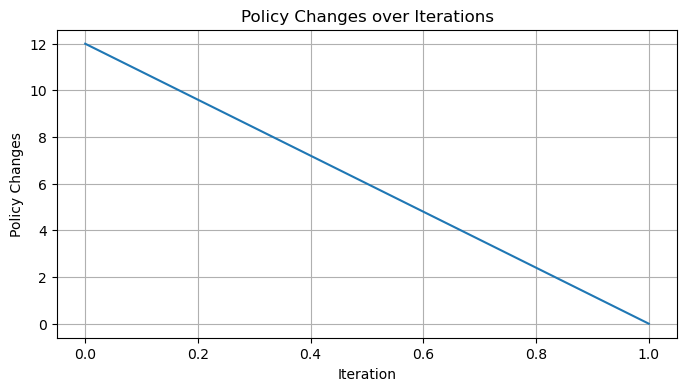

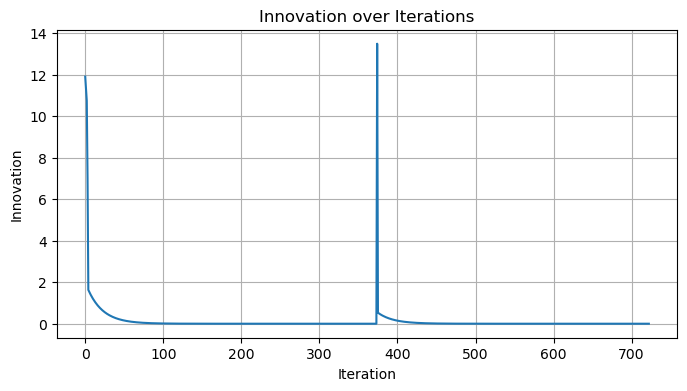

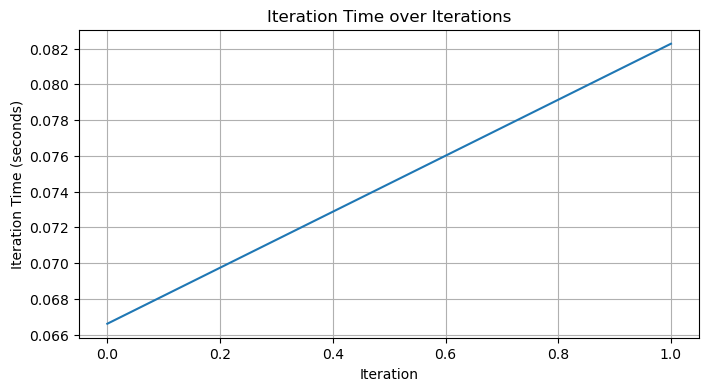

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
n_rooms = 9
states_per_room = 2  # Clean, Dirty
n_states = n_rooms * states_per_room
n_actions = 2  # Move, Clean (Recharge action removed)
gamma = 0.95  # discount factor
epsilon = 1e-8  # convergence threshold (adjusted for better convergence check)
max_iterations = 1000

# Initialize Transition and Reward Matrices
P = np.zeros((n_actions, n_states, n_states))
R = np.zeros((n_states, n_actions))

# Initialize Policy and Value arrays
policy = np.random.randint(n_actions, size=n_states)
V = np.zeros(n_states)

# Metrics
policy_stable = False
iterations = []
policy_changes = []
iteration_times = []
innovations = []

# Populate the transition probabilities and rewards
for room in range(n_rooms):
    for cleanliness in range(states_per_room):
        state_index = room * states_per_room + cleanliness
        
        # Move action
        if room < n_rooms - 1:
            next_room = room + 1
        else:
            next_room = 0
        next_state = next_room * states_per_room + cleanliness
        P[0, state_index, next_state] = 1
        R[state_index, 0] = -1  # Cost for moving
        
        # Clean action
        if cleanliness == 1:  # If the room is dirty
            P[1, state_index, state_index - 1] = 1  # Room becomes clean
            R[state_index, 1] = 10  # Reward for cleaning
        else:
            P[1, state_index, state_index] = 1  # No effect if the room is already clean
            R[state_index, 1] = 2  # Small reward for being in a clean room

# Policy Iteration algorithm
while not policy_stable and len(iterations) < max_iterations:
    start_time = time.time()

    # Policy Evaluation
    while True:
        delta = 0
        for state in range(n_states):
            v = V[state]
            action = policy[state]
            V[state] = sum([P[action, state, next_state] * (R[state, action] + gamma * V[next_state])
                            for next_state in range(n_states)])
            delta = max(delta, abs(v - V[state]))
        innovations.append(delta)  # Record innovation for this evaluation step
        if delta < epsilon:
            break

    # Policy Improvement
    policy_stable = True
    change_count = 0
    for state in range(n_states):
        old_action = policy[state]
        Q_values = [sum(P[action, state, next_state] * (R[state, action] + gamma * V[next_state])
                        for next_state in range(n_states)) for action in range(n_actions)]
        best_action = np.argmax(Q_values)
        policy[state] = best_action
        if old_action != best_action:
            policy_stable = False
            change_count += 1

    policy_changes.append(change_count)
    iteration_time = time.time() - start_time
    iteration_times.append(iteration_time)
    iterations.append(len(iterations))

    if policy_stable:
        print(f"Policy Iteration converged in {len(iterations)} iterations.")

# Plotting the metrics on separate canvases
# Policy Changes Plot
plt.figure(figsize=(8, 4))
plt.plot(iterations, policy_changes)
plt.xlabel('Iteration')
plt.ylabel('Policy Changes')
plt.title('Policy Changes over Iterations')
plt.grid(True)

plt.show()

# Innovation Plot
plt.figure(figsize=(8, 4))
plt.plot(range(len(innovations)), innovations)
plt.xlabel('Iteration')
plt.ylabel('Innovation')
plt.title('Innovation over Iterations')
plt.grid(True)

plt.show()

# Iteration Time Plot
plt.figure(figsize=(8, 4))
plt.plot(iterations, iteration_times)
plt.xlabel('Iteration')
plt.ylabel('Iteration Time (seconds)')
plt.title('Iteration Time over Iterations')
plt.grid(True)

plt.show()


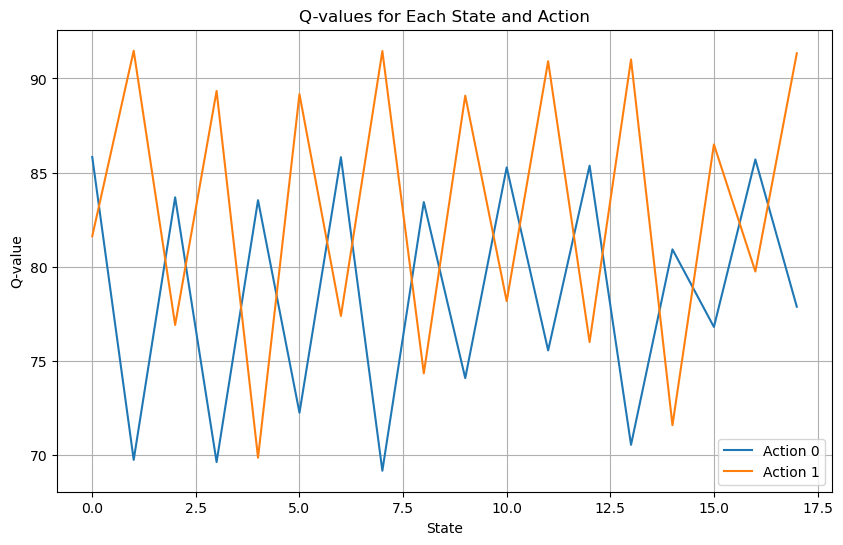

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_rooms = 9
states_per_room = 2  # 0 for Clean, 1 for Dirty
n_states = n_rooms * states_per_room
n_actions = 2  # 0: Move, 1: Clean 
gamma = 0.95  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99  # More aggressive decay for quicker exploration reduction
min_epsilon = 0.01
n_episodes = 300  # Reduced number of episodes
max_steps_per_episode = 50  # Maximum steps per episode to limit runtime

# Initialize Reward Structure
reward_structure = {'Clean': 10, 'Move': -1, 'Stay': 2}
rewards = np.zeros((n_states, n_actions))
for state in range(n_states):
    cleanliness = state % states_per_room
    rewards[state, 1] = reward_structure['Clean'] if cleanliness == 1 else reward_structure['Stay']
    rewards[state, 0] = reward_structure['Move']

# Q-table
Q = np.zeros((n_states, n_actions))

# Next State Function
def get_next_state(state, action):
    if action == 0:  # Move
        return (state + 1) % n_states  # Simplified movement: move to next state in a cycle
    elif action == 1 and state % states_per_room == 1:  # Clean if dirty
        return state - 1  # Assumes moving to clean state
    return state  # Stay in the same state if already clean

# Q-learning algorithm
for episode in range(n_episodes):
    state = np.random.randint(n_states)
    for step in range(max_steps_per_episode):
        if np.random.rand() < epsilon:
            action = np.random.choice(n_actions)  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        next_state = get_next_state(state, action)
        reward = rewards[state, action]
        
        # Q-value update
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        
        state = next_state  # Move to the next state

    epsilon = max(min_epsilon, epsilon * epsilon_decay)  # Decay epsilon

# Plotting the learned Q-values
plt.figure(figsize=(10, 6))
for a in range(n_actions):
    plt.plot(Q[:, a], label=f"Action {a}")
plt.legend()
plt.title('Q-values for Each State and Action')
plt.xlabel('State')
plt.ylabel('Q-value')
plt.grid(True)

plt.show()


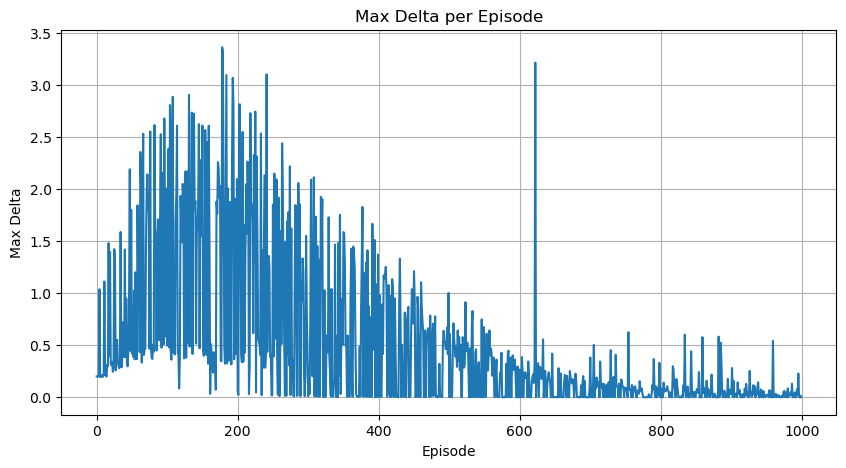

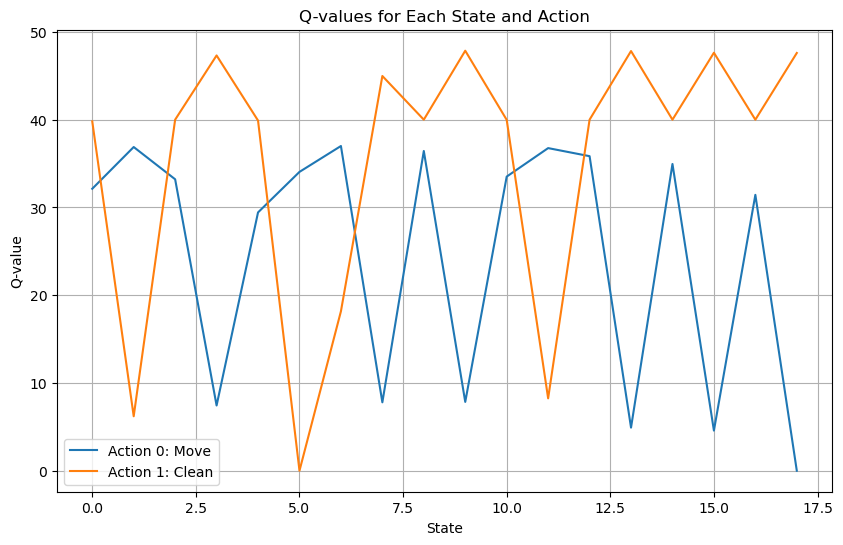

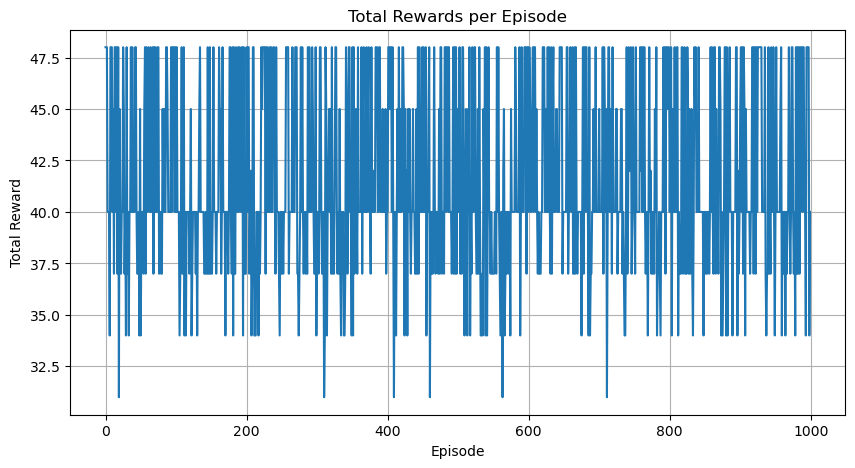

In [94]:
# Given code with minimal changes to add requested plots
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_rooms = 9
states_per_room = 2  # 0 for Clean, 1 for Dirty
n_states = n_rooms * states_per_room
n_actions = 2  # 0: Move, 1: Clean
gamma = 0.95  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99  # Decay rate of epsilon per episode
min_epsilon = 0.01
n_episodes = 1000  # Number of training episodes
max_steps_per_episode = 20  # Limit steps to avoid infinite loops

# Reward and Transition Structures
rewards = np.zeros((n_states, n_actions))
P = np.zeros((n_states, n_actions, n_states))  # Transition probabilities

for room in range(n_rooms):
    for cleanliness in range(states_per_room):
        state = room * states_per_room + cleanliness
        next_room = (room + 1) % n_rooms
        next_clean_state = next_room * states_per_room
        next_dirty_state = next_room * states_per_room + 1
        
        # Move action
        P[state, 0, next_clean_state] = 1.0  # Move to next room, assumed clean
        P[state, 0, next_dirty_state] = 0.0  # No transition to dirty state
        rewards[state, 0] = -1  # Penalty for moving

        # Clean action
        if cleanliness == 1:  # Dirty
            P[state, 1, state - 1] = 1.0  # Transition to clean state
            rewards[state, 1] = 10  # Reward for cleaning
        else:  # Clean
            P[state, 1, state] = 1.0  # No effect from cleaning
            rewards[state, 1] = 2  # Small reward for staying

# Initialize Q-table
Q = np.zeros((n_states, n_actions))
max_deltas = []  # Track max Q-value change per episode

# Q-learning algorithm
for episode in range(n_episodes):
    state = np.random.randint(n_states)
    max_delta = 0  # Initialize max delta for this episode

    for step in range(max_steps_per_episode):
        action = np.random.choice(n_actions) if np.random.rand() < epsilon else np.argmax(Q[state])

        # Get reward and next state using the transition probabilities
        next_state = np.random.choice(n_states, p=P[state, action])
        reward = rewards[state, action]
        
        # Q-value update
        old_value = Q[state, action]
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - old_value)
        
        # Track maximum change in Q-value
        delta = abs(old_value - Q[state, action])
        max_delta = max(max_delta, delta)

        state = next_state  # Move to the next state

    max_deltas.append(max_delta)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)  # Decay epsilon

# Plotting max_delta per episode
plt.figure(figsize=(10, 5))
plt.plot(max_deltas)
plt.title('Max Delta per Episode')
plt.xlabel('Episode')
plt.ylabel('Max Delta')
plt.grid(True)
plt.show()

# Plotting the learned Q-values
plt.figure(figsize=(10, 6))
for a in range(n_actions):
    plt.plot(Q[:, a], label=f'Action {a}: {"Move" if a == 0 else "Clean"}')
plt.legend()
plt.title('Q-values for Each State and Action')
plt.xlabel('State')
plt.ylabel('Q-value')
plt.grid(True)

plt.show()

# Plotting rewards per episode
total_rewards = np.zeros(n_episodes)

for episode in range(n_episodes):
    state = np.random.randint(n_states)
    total_reward = 0

    for step in range(max_steps_per_episode):
        action = np.random.choice(n_actions) if np.random.rand() < epsilon else np.argmax(Q[state])
        reward = rewards[state, action]
        total_reward += reward
        next_state = np.random.choice(n_states, p=P[state, action])
        state = next_state

    total_rewards[episode] = total_reward

plt.figure(figsize=(10, 5))
plt.plot(total_rewards)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()


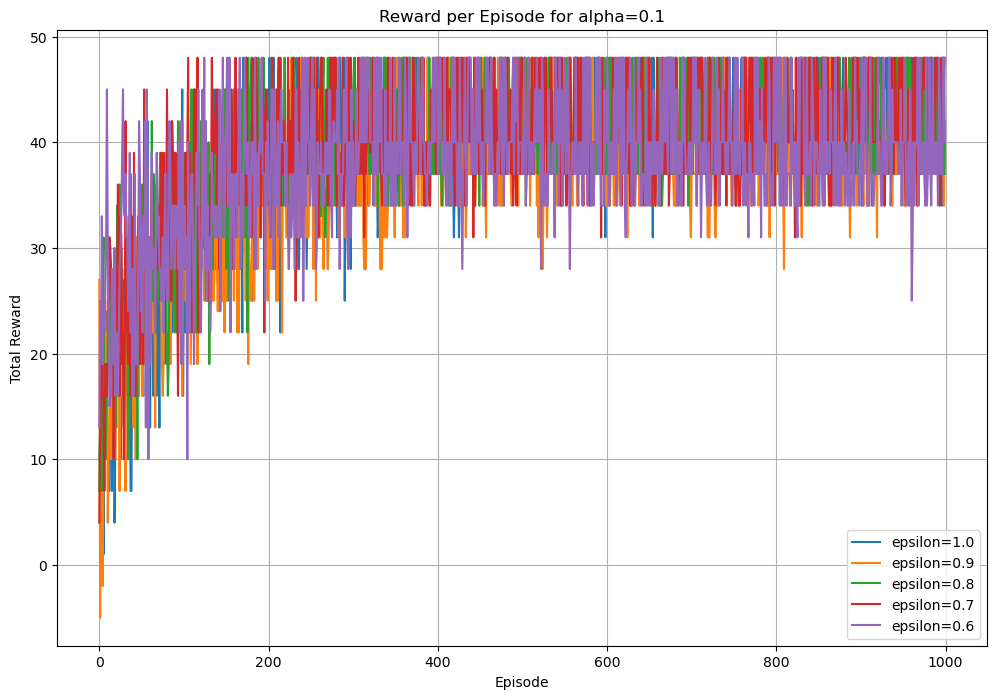

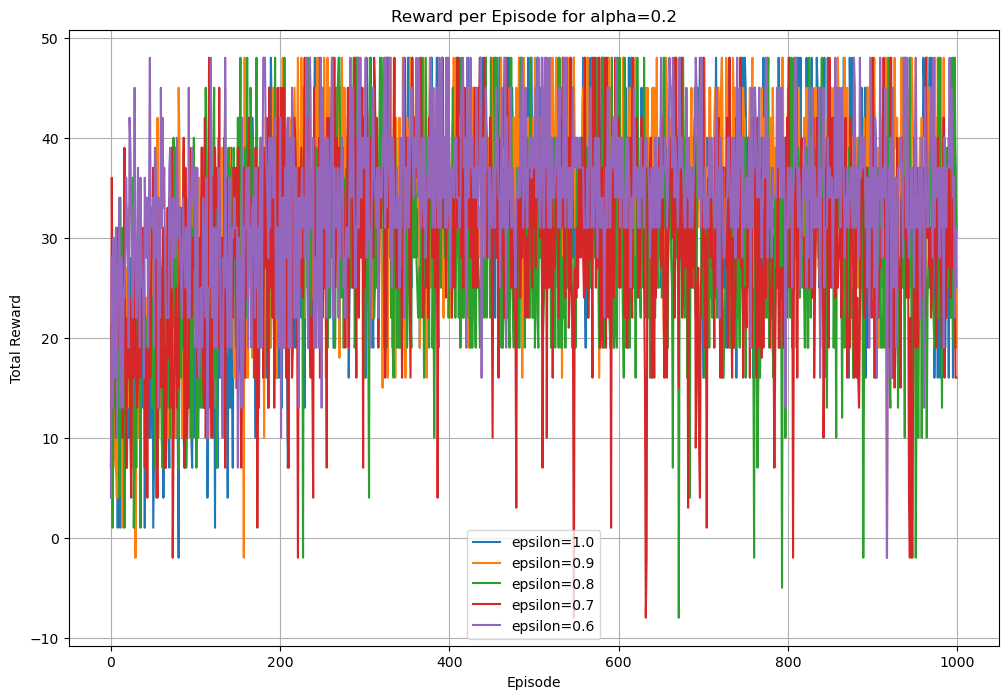

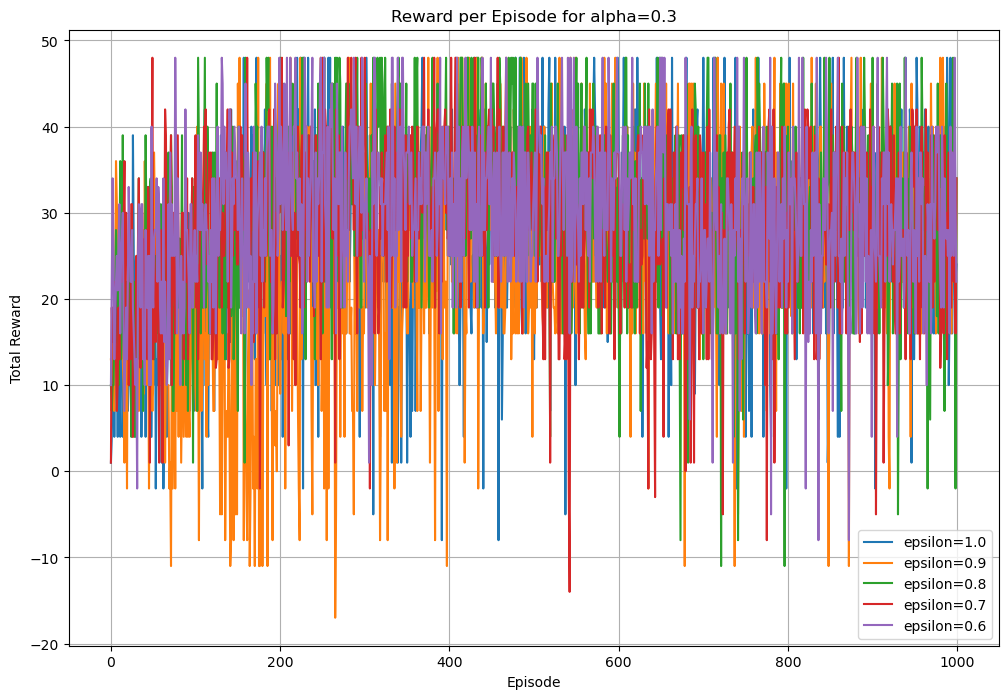

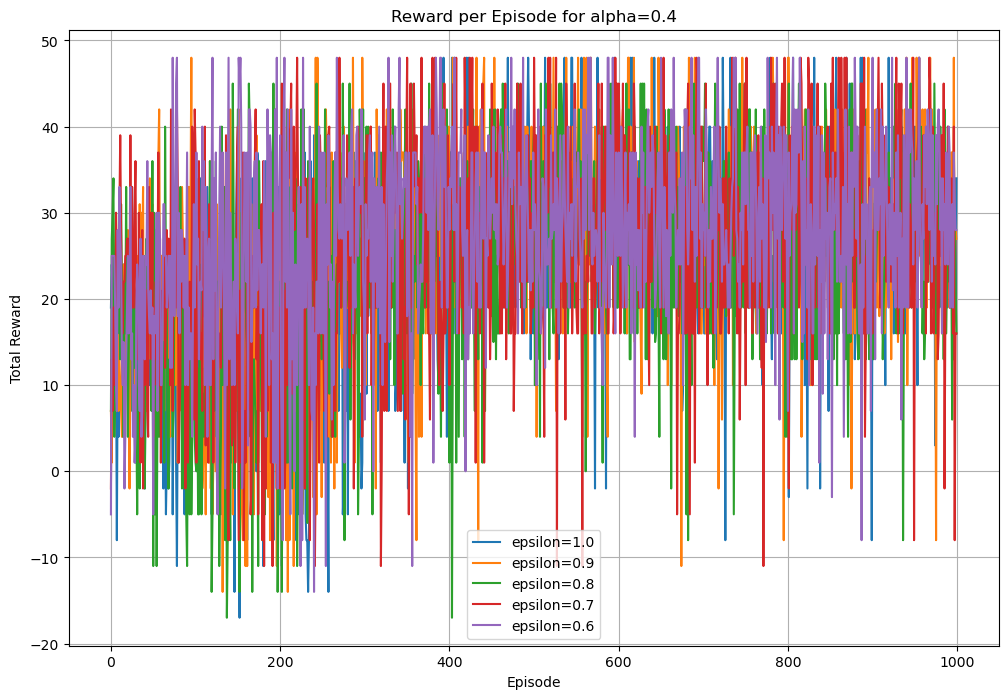

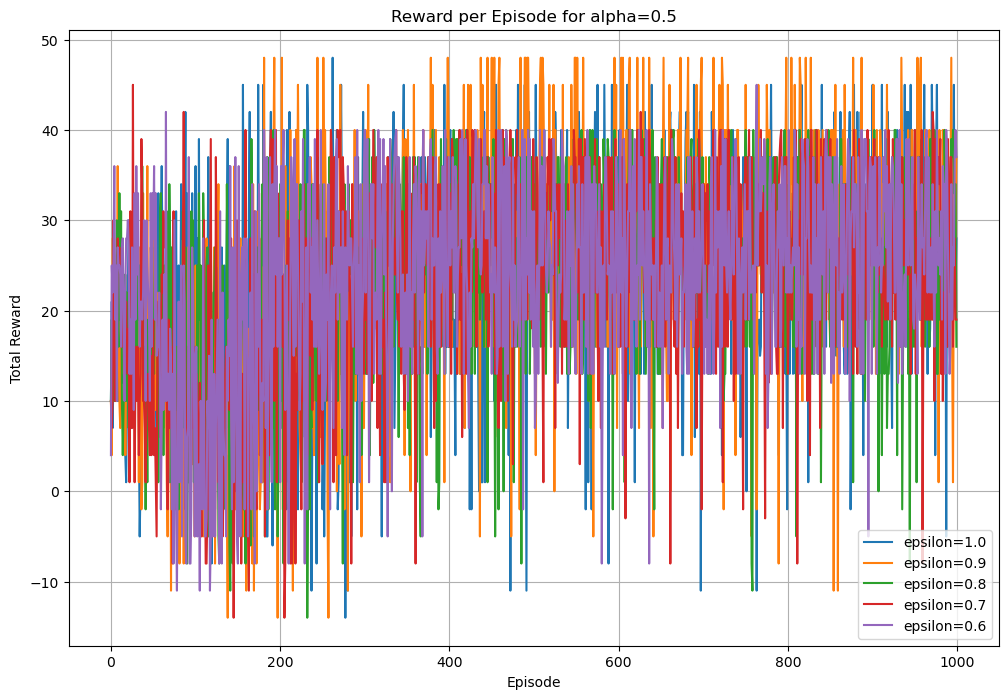

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_rooms = 9
states_per_room = 2  # 0 for Clean, 1 for Dirty
n_states = n_rooms * states_per_room
n_actions = 2  # 0: Move, 1: Clean
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]  # Learning rates
epsilons = [1.0, 0.9, 0.8, 0.7, 0.6]  # Exploration rates
epsilon_decay = 0.99  # Decay rate of epsilon per episode
min_epsilon = 0.01
n_episodes = 1000  # Number of training episodes
max_steps_per_episode = 20  # Limit steps to avoid infinite loops

# Initialize the reward and transition structures
rewards_structure = {'Clean': 10, 'Move': -1, 'Stay': 2}
rewards = np.zeros((n_states, n_actions))
P = np.zeros((n_states, n_actions, n_states))  # Transition probabilities

# Define transition probabilities and rewards
for room in range(n_rooms):
    for cleanliness in range(states_per_room):
        state = room * states_per_room + cleanliness
        next_room = (room + 1) % n_rooms
        next_clean_state = next_room * states_per_room
        next_dirty_state = next_room * states_per_room + 1

        # Move action
        P[state, 0, next_clean_state] = 1.0  # Move to next room, assumed clean
        P[state, 0, next_dirty_state] = 0.0  # No transition to dirty state
        rewards[state, 0] = rewards_structure['Move']

        # Clean action
        if cleanliness == 1:  # Dirty
            P[state, 1, state - 1] = 1.0  # Transition to clean state
            rewards[state, 1] = rewards_structure['Clean']
        else:  # Clean
            P[state, 1, state] = 1.0  # No effect from cleaning
            rewards[state, 1] = rewards_structure['Stay']

# Run Q-learning algorithm for each alpha and epsilon
for alpha in alphas:
    plt.figure(figsize=(12, 8))
    
    for initial_epsilon in epsilons:  # Use initial_epsilon to avoid overwriting
        Q = np.zeros((n_states, n_actions))  # Initialize Q-table
        total_rewards_per_episode = []
        epsilon = initial_epsilon  # Reset epsilon to the initial value for this loop

        for episode in range(n_episodes):
            state = np.random.randint(n_states)
            total_reward = 0

            for step in range(max_steps_per_episode):
                action = np.random.choice(n_actions) if np.random.rand() < epsilon else np.argmax(Q[state])

                # Get reward and next state using the transition probabilities
                next_state = np.random.choice(n_states, p=P[state, action])
                reward = rewards[state, action]

                # Q-value update
                Q[state, action] += alpha * (reward + np.max(Q[next_state]) - Q[state, action])
                total_reward += reward
                state = next_state  # Move to the next state

            total_rewards_per_episode.append(total_reward)
            epsilon = max(min_epsilon, epsilon * epsilon_decay)  # Decay epsilon

        # Plotting reward per episode for this alpha and initial_epsilon
        plt.plot(total_rewards_per_episode, label=f'epsilon={initial_epsilon}')

    plt.title(f'Reward per Episode for alpha={alpha}')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True)
    plt.show()
